# Linear Regression in TensorFlow

In [54]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
rng = numpy.random

### Parameters

In [55]:
learning_rate = 0.01
training_epochs = 2000
display_step = 50

### Training Data

In [56]:
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

### TensorFlow Graph Input

In [57]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Create Model

### Set model weights

In [58]:
W = tf.Variable(rng.randn(), name = "weight")
b = tf.Variable(rng.randn(), name = "bias")

### Construct a linear model

In [59]:
activation = tf.add(tf.mul(X, W), b)

### Minimize the squared errors

In [60]:
cost = tf.reduce_sum(tf.pow(activation - Y, 2)) / (2 * n_samples) # L2 loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

### Initializing the variables

In [61]:
init = tf.initialize_all_variables()

### Launch the graph

Epoch: 1
cost = 3.493549585   W = -0.0417965613306   b = 0.104433812201
Epoch: 51
cost = 0.099508494   W = 0.333628118038   b = 0.196927830577
Epoch: 101
cost = 0.096902639   W = 0.328630208969   b = 0.232882708311
Epoch: 151
cost = 0.094597951   W = 0.323929488659   b = 0.266699194908
Epoch: 201
cost = 0.092559651   W = 0.319508314133   b = 0.298504650593
Epoch: 251
cost = 0.090756983   W = 0.315350204706   b = 0.328417956829
Epoch: 301
cost = 0.089162730   W = 0.311439454556   b = 0.356552183628
Epoch: 351
cost = 0.087752759   W = 0.30776104331   b = 0.383013486862
Epoch: 401
cost = 0.086505830   W = 0.30430161953   b = 0.407900899649
Epoch: 451
cost = 0.085403107   W = 0.301047861576   b = 0.431307941675
Epoch: 501
cost = 0.084427923   W = 0.297987610102   b = 0.45332339406
Epoch: 551
cost = 0.083565511   W = 0.295109272003   b = 0.47402960062
Epoch: 601
cost = 0.082802936   W = 0.292402327061   b = 0.493503332138
Epoch: 651
cost = 0.082128592   W = 0.289856284857   b = 0.5118190050

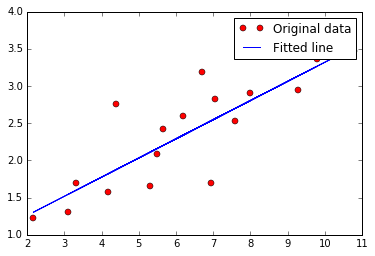

In [62]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict = {X: x, Y: y})
            
        if epoch % display_step == 0:
            print "Epoch: {}".format(epoch+1)
            ct = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "cost = {:.9f}   W = {}   b = {}".format(ct, sess.run(W), sess.run(b))
            
    print "Optimization Finished!"
    ct = sess.run(cost, feed_dict = {X: train_X, Y: train_Y})
    print "cost = {:.9f}   W = {}   b = {}".format(ct, sess.run(W), sess.run(b))

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()            